In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

using the gray scale to do some preprocess

In [2]:
# Load the image
gray_image = cv2.imread('ComputerDepartment_gray.jpg', cv2.IMREAD_UNCHANGED)

gray_image

array([[188, 199, 197, ..., 179, 179, 177],
       [174, 186, 187, ..., 177, 177, 177],
       [177, 184, 184, ..., 178, 178, 182],
       ...,
       [ 43,  49,  54, ...,  41,  41,  42],
       [ 58,  59,  63, ...,  39,  42,  45],
       [ 44,  43,  48, ...,  36,  40,  45]], dtype=uint8)

<h3>Histogram</h3>

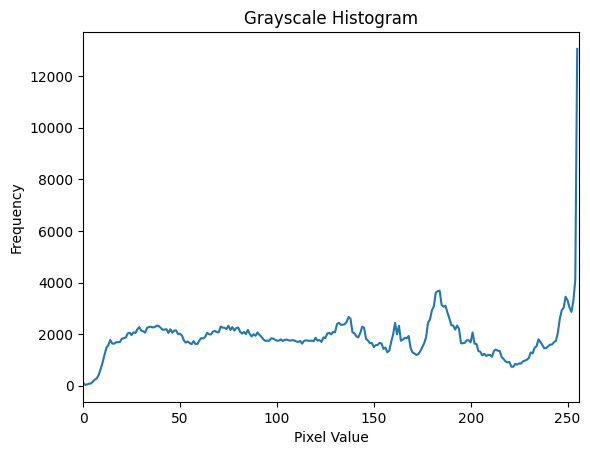

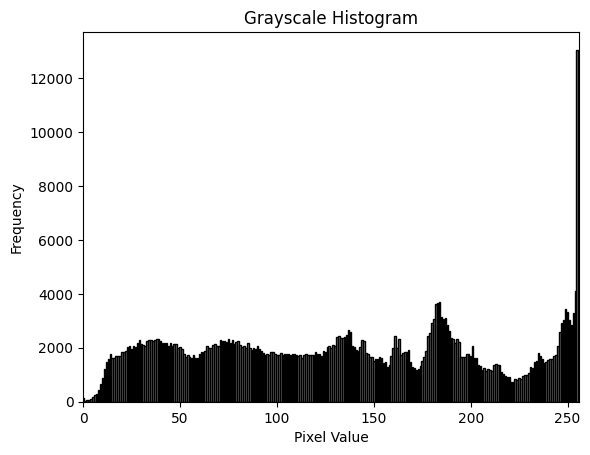

In [3]:
# Calculate the histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# ------------------------------------------

# Calculate the histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.bar(np.arange(256), hist[:,0], color='gray', edgecolor='black')
plt.xlim([0, 256])
plt.show()

Above histogram shows that the picture is kinda too light

<h1>Gamma Correction</h1>

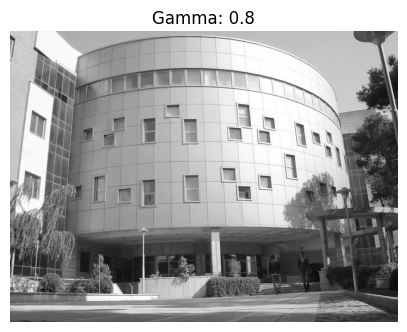

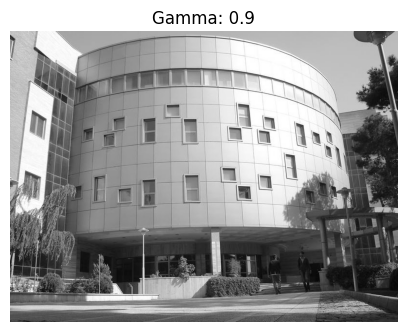

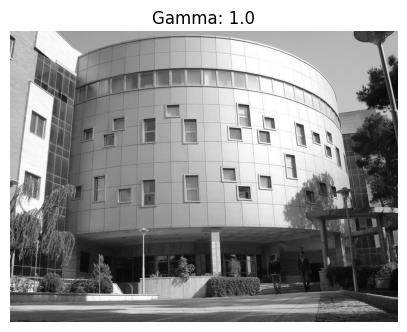

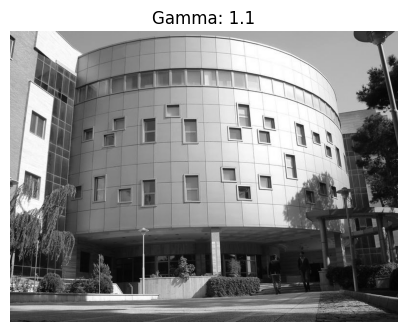

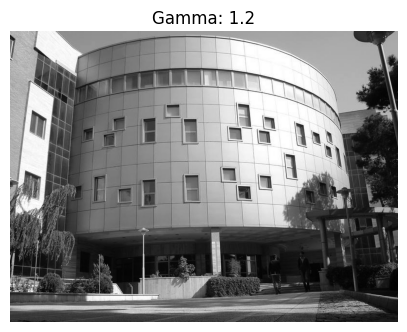

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_float = gray_image.astype(np.float32) / 255.0

# Define the range of gamma values
gamma_range = np.arange(0.8, 1.3, 0.1)

# Apply gamma correction for each gamma value and display the images separately
for gamma in gamma_range:
    # Apply gamma correction
    corrected_image = np.power(image_float, gamma)
    
    # Clip the pixel values to the valid range [0, 1]
    corrected_image = np.clip(corrected_image, 0, 1)
    
    # Convert the corrected image back to uint8 format
    corrected_image_uint8 = (corrected_image * 255).astype(np.uint8)
    
    # Display the corrected image with the gamma value as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(corrected_image_uint8, cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma: {gamma}')
    plt.axis('off')
    plt.show()


For detecting windows it seems using gamma = 1.2 is fine for having more accuracy

until here i was trying to find a way that the code can detect the pictures itself:) bye